### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

#### 1. Import the necessary packages - 2.5 marks

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format  

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [73]:
# loading data.csv into dataframe 
df_data = pd.read_csv('Data.csv')

# loading item.csv into dataframe 
df_item = pd.read_csv('Item.csv')

# loading user.csv into dataframe 
df_user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [5]:
# reviewing info of Data dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
# reviewing number of rows and columns for Data dataframe
df_data.shape

(100000, 4)

In [7]:
# Mean of Data dataframe

print("df_data Mean:")
print(df_data.mean())

df_data Mean:
user id             462.48
movie id            425.53
rating                3.53
timestamp   883,528,851.49
dtype: float64


In [8]:
# Mean of Data dataframe 

print("df_data Mode:")
print(df_data.mode())

df_data Mode:
   user id  movie id  rating  timestamp
0      405        50       4  891033606


In [9]:
# Median of Data dataframe 

print("df_data Median:")
print(df_data.median())

df_data Median:
user id             447.00
movie id            322.00
rating                4.00
timestamp   882,826,944.00
dtype: float64


In [10]:
print("df_data_quantile(25%):\r",df_data.quantile(q=0.25))

 user id             254.00
movie id            175.00
rating                3.00
timestamp   879,448,709.50
Name: 0.25, dtype: float64


In [11]:
print("df_data_quantile(50%):\r",df_data.quantile(q=0.50))

 user id             447.00
movie id            322.00
rating                4.00
timestamp   882,826,944.00
Name: 0.5, dtype: float64


In [12]:
print("df_data_quantile(75%):\r",df_data.quantile(q=0.75))

 user id             682.00
movie id            631.00
rating                4.00
timestamp   888,259,984.00
Name: 0.75, dtype: float64


In [13]:
df_data.describe()

,user id,movie id,rating,timestamp
count,"100,000.00","100,000.00","100,000.00","100,000.00"
mean,462.48,425.53,3.53,"883,528,851.49"
std,266.61,330.80,1.13,"5,343,856.19"
min,1.00,1.00,1.00,"874,724,710.00"
25%,254.00,175.00,3.00,"879,448,709.50"
50%,447.00,322.00,4.00,"882,826,944.00"
75%,682.00,631.00,4.00,"888,259,984.00"
max,943.00,"1,682.00",5.00,"893,286,638.00"


In [14]:
df_data.isnull()

,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [15]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [16]:
df_item.shape

(1681, 22)

In [17]:
df_item.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,"1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00","1,681.00"
mean,841.84,0.00,0.15,0.08,0.02,0.07,0.30,0.06,0.03,0.43,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,0.02,0.36,0.27,0.16,0.26,0.46,0.25,0.17,0.50,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"1,262.00",0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"1,682.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [18]:
df_item.isnull()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [20]:
df_user.shape

(943, 5)

In [21]:
df_user.describe()

,user id,age
count,943.00,943.00
mean,472.00,34.05
std,272.36,12.19
min,1.00,7.00
25%,236.50,25.00
50%,472.00,31.00
75%,707.50,43.00
max,943.00,73.00


In [22]:
df_user.isnull()

,user id,age,gender,occupation,zip code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
938,False,False,False,False,False
939,False,False,False,False,False
940,False,False,False,False,False
941,False,False,False,False,False


#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [23]:
# use sum on the default axis
df_item.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 5 marks

In [24]:
#hint: use sum on the axis = 1
#df_item.groupby(by=['movie title']).sum()

column_list = list(df_item)

column_list.remove('movie id')
column_list.remove('release date')
column_list.remove('movie title')

df_item["Total Genres"] = 0
df_item["Total Genres"] = df_item[column_list].sum(axis=1)

df_item[df_item['Total Genres'] > 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total Genres
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,3
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [25]:
df_item.drop(df_item.index[df_item['unknown'] == 1], inplace = True)
df_item

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total Genres
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [26]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [27]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


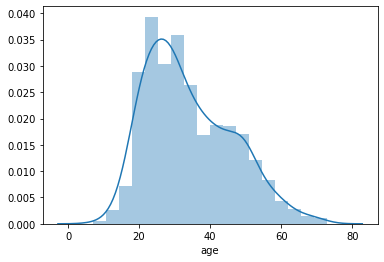

In [28]:
#your answers here
sns.distplot(df_user['age'])

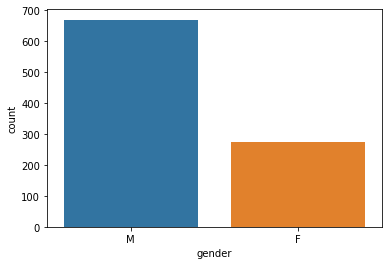

In [29]:
sns.countplot(df_user['gender'])

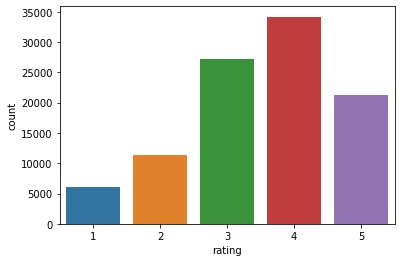

In [30]:
sns.countplot(df_data['rating'])

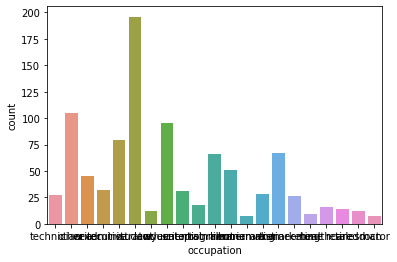

In [31]:
sns.countplot(df_user['occupation'])

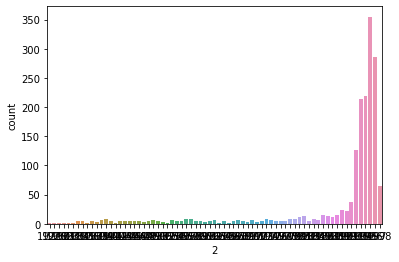

In [32]:
sns.countplot(df_item['release date'].str.split('-', expand=True)[2])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [33]:
#Your answer here

#df_item.groupby(by=['Action'])['release date'].sum()
#.reset_index().sort_values(['suicides_no']
#ascending=True).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

df_item['release year'] = df_item['release date'].str.split('-', expand=True)[2]

df_item.sum = 0
df_item.groupby(by=['release year']).sum()

#### FALTA GRAFICA


,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total Genres
release year,,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1926,1542,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1930,617,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1931,656,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,3
1932,1124,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,...,0,8,2,2,35,7,25,7,6,353
1995,183514,0,40,22,6,21,63,11,5,89,...,1,14,3,5,37,15,39,5,2,381
1996,322295,0,44,24,9,21,108,21,18,170,...,1,11,9,6,38,15,47,9,2,559


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [76]:
#your answer here
#df_item = df_item.merge(df_data, how='outer').sort_values('x')



df_item_data = df_item.merge(df_data, on='movie id').groupby(by=['movie title']).count()
#df_item_data.drop(['release date', 'unknown'], axis=1)

#df_item_data = pd.merge(df_item, df_data, on='movie id')
#df_item_data.groupby(by=['release year'])

df_item_data

,movie id,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,timestamp
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
1-900,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
101 Dalmatians,109,109,109,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
12 Angry Men,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
187,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,101,101
Young Guns II,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
"Young Poisoner's Handbook, The",41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [35]:
#write the conclusions here